<a href="https://colab.research.google.com/github/GabeMaldonado/UoL_Study_Materials/blob/main/Copy_of_Bayesian_networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Library

import numpy as np

In [2]:
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.1 MB/s 


In [3]:

from pgmpy.factors.discrete import TabularCPD

In [4]:
from pgmpy.models import BayesianModel

We define the network structure, named office_model, using BayesianModel


We import VariableElimination, so we can start probabilistic inference to calculate various the probabilities. For example, what is the probability of receiving a response? what a probability of receiving a response by skype? by email? and so on


In [ ]:
from pgmpy.inference import VariableElimination

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# making the national soccer team

national_team_model = BayesianModel([("Health", "Selection"),
                               ("Play_Consistency", "Selection"),
                               ("Top_League", "Selection"),
                               ("Professionalism", "Selection"),
                               ("Selection", "Call-up")])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [34]:
health_cpd = TabularCPD(
              variable = "Health",
              variable_card = 2,
              values = [[0.1], [.9]])

In [35]:
print(health_cpd)

+-----------+-----+
| Health(0) | 0.1 |
+-----------+-----+
| Health(1) | 0.9 |
+-----------+-----+


In [7]:
play_cons_cpd = TabularCPD(
                variable = "Play_Consistency",
                variable_card = 2,
                values = [[.3], [.7]])

In [36]:
top_league_cpd = TabularCPD(
                  variable = "Top_League",
                  variable_card = 2,
                  values = [[.2], [.8]])

In [9]:
'''prior_calls_cpd = TabularCPD(
                    variable = 'Prior_Calls',
                    variable_card = 2,
                    values = [[.2], [.8]]
)
'''

"prior_calls_cpd = TabularCPD(\n                    variable = 'Prior_Calls',\n                    variable_card = 2,\n                    values = [[.2], [.8]]\n)\n"

In [10]:
prof_cpd = TabularCPD(
            variable = "Professionalism",
            variable_card = 2,
            values = [[.4], [.6]]
)

In [11]:
call_up_cpd = TabularCPD(
                  variable = "Call-up",
                  variable_card = 2,
                  values = [[.95, .8, .5],
                            [.05, .2, .5]],
                  evidence = ['Selection'],
                  evidence_card = [3])

In [45]:
import pandas as pd


In [50]:
selection_cpd = TabularCPD(
                  variable = "Selection",
                  variable_card = 3,
                  values=[[.3, .4, .6, .8, 1.0, .9, 1.0, 1.0, 1.0, .6, .8, .7, .6, .8, .7, .4],
                          [.3, .3, .2, .1,   0, .1,   0,   0,   0, .2, .1, .1, .2, .1, .1, .3], 
                          [.4, .3, .2, .1,   0,  0,   0,   0,   0, .2, .1, .2, .2, .1, .2, .3]],                           
                  evidence = ["Health", "Play_Consistency", "Top_League", "Professionalism"],
                  evidence_card = [2, 2, 2, 2])
df = pd.DataFrame(data=print(selection_cpd))
df

+------------------+-----+---------------------+
| Health           | ... | Health(1)           |
+------------------+-----+---------------------+
| Play_Consistency | ... | Play_Consistency(1) |
+------------------+-----+---------------------+
| Top_League       | ... | Top_League(1)       |
+------------------+-----+---------------------+
| Professionalism  | ... | Professionalism(1)  |
+------------------+-----+---------------------+
| Selection(0)     | ... | 0.4                 |
+------------------+-----+---------------------+
| Selection(1)     | ... | 0.3                 |
+------------------+-----+---------------------+
| Selection(2)     | ... | 0.3                 |
+------------------+-----+---------------------+


""


In [13]:
# add relationships to the model
national_team_model.add_cpds(health_cpd, play_cons_cpd, top_league_cpd, prof_cpd, call_up_cpd, selection_cpd)

In [14]:
# get conditional probability distributions
national_team_model.get_cpds()

[<TabularCPD representing P(Health:2) at 0x7f759007bad0>,
 <TabularCPD representing P(Play_Consistency:2) at 0x7f74806aa9d0>,
 <TabularCPD representing P(Top_League:2) at 0x7f7480646350>,
 <TabularCPD representing P(Professionalism:2) at 0x7f7480650ed0>,
 <TabularCPD representing P(Call-up:2 | Selection:3) at 0x7f7480646850>,
 <TabularCPD representing P(Selection:3 | Health:2, Play_Consistency:2, Top_League:2, Professionalism:2) at 0x7f7480646290>]

In [15]:
# find active trail nodes
national_team_model.active_trail_nodes('Health')

{'Health': {'Call-up', 'Health', 'Selection'}}

In [16]:
national_team_model.active_trail_nodes('Top_League')

{'Top_League': {'Call-up', 'Selection', 'Top_League'}}

In [17]:
national_team_model.active_trail_nodes('Selection')

{'Selection': {'Call-up',
  'Health',
  'Play_Consistency',
  'Professionalism',
  'Selection',
  'Top_League'}}

In [18]:
national_team_model.active_trail_nodes('Call-up')

{'Call-up': {'Call-up',
  'Health',
  'Play_Consistency',
  'Professionalism',
  'Selection',
  'Top_League'}}

In [19]:
# get all independencies
national_team_model.get_independencies()

(Health ⟂ Top_League, Professionalism, Play_Consistency)
(Health ⟂ Play_Consistency, Professionalism | Top_League)
(Health ⟂ Call-up | Selection)
(Health ⟂ Top_League, Play_Consistency | Professionalism)
(Health ⟂ Top_League, Professionalism | Play_Consistency)
(Health ⟂ Call-up | Top_League, Selection)
(Health ⟂ Play_Consistency | Top_League, Professionalism)
(Health ⟂ Professionalism | Top_League, Play_Consistency)
(Health ⟂ Call-up | Selection, Professionalism)
(Health ⟂ Call-up | Selection, Play_Consistency)
(Health ⟂ Top_League | Play_Consistency, Professionalism)
(Health ⟂ Call-up | Top_League, Selection, Professionalism)
(Health ⟂ Call-up | Top_League, Selection, Play_Consistency)
(Health ⟂ Call-up | Selection, Professionalism, Play_Consistency)
(Health ⟂ Call-up | Top_League, Selection, Professionalism, Play_Consistency)
(Call-up ⟂ Health, Top_League, Professionalism, Play_Consistency | Selection)
(Call-up ⟂ Top_League, Professionalism, Play_Consistency | Health, Selection)
(Ca

In [20]:
# get local independencies
national_team_model.local_independencies("Health")

(Health ⟂ Top_League, Professionalism, Play_Consistency)

In [21]:
national_team_model.local_independencies("Selection")

In [22]:
from pgmpy.inference import VariableElimination

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
national_team_infer = VariableElimination(national_team_model)

In [24]:
prob_call_up = national_team_infer.query(variables=['Call-up'], joint=False)
print(prob_call_up)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

{'Call-up': <DiscreteFactor representing phi(Call-up:2) at 0x7f746f7b8850>}


In [25]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up', 'Health'], joint=False)
print(prob_call_up_good_health['Health'])
print(prob_call_up_good_health['Call-up'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------+---------------+
| Health    |   phi(Health) |
+===========+===============+
| Health(0) |        0.0000 |
+-----------+---------------+
| Health(1) |        1.0000 |
+-----------+---------------+
+------------+----------------+
| Call-up    |   phi(Call-up) |
+============+================+
| Call-up(0) |         0.8341 |
+------------+----------------+
| Call-up(1) |         0.1659 |
+------------+----------------+


In [26]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up', 'Top_League'], joint=False)
print(prob_call_up_good_health['Top_League'])
print(prob_call_up_good_health['Call-up'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+---------------+-------------------+
| Top_League    |   phi(Top_League) |
+===============+===================+
| Top_League(0) |            0.3000 |
+---------------+-------------------+
| Top_League(1) |            0.7000 |
+---------------+-------------------+
+------------+----------------+
| Call-up    |   phi(Call-up) |
+============+================+
| Call-up(0) |         0.8341 |
+------------+----------------+
| Call-up(1) |         0.1659 |
+------------+----------------+


In [27]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up', 'Play_Consistency'], joint=False)
print(prob_call_up_good_health['Play_Consistency'])


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+---------------------+-------------------------+
| Play_Consistency    |   phi(Play_Consistency) |
+=====================+=========================+
| Play_Consistency(0) |                  0.3000 |
+---------------------+-------------------------+
| Play_Consistency(1) |                  0.7000 |
+---------------------+-------------------------+


In [28]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up', 'Professionalism'], joint=False)
print(prob_call_up_good_health['Professionalism'])


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+--------------------+------------------------+
| Professionalism    |   phi(Professionalism) |
+====================+========================+
| Professionalism(0) |                 0.4000 |
+--------------------+------------------------+
| Professionalism(1) |                 0.6000 |
+--------------------+------------------------+


In [29]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up'],
                                                     evidence={'Professionalism':0},
                                                     joint=False)
print(prob_call_up_good_health['Call-up'])


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------+----------------+
| Call-up    |   phi(Call-up) |
+============+================+
| Call-up(0) |         0.8608 |
+------------+----------------+
| Call-up(1) |         0.1393 |
+------------+----------------+


In [30]:
prob_call_up_good_health = national_team_infer.query(variables=['Call-up'],
                                                     evidence={'Health':0},
                                                     joint=False)
print(prob_call_up_good_health['Call-up'])

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+------------+----------------+
| Call-up    |   phi(Call-up) |
+============+================+
| Call-up(0) |         0.9126 |
+------------+----------------+
| Call-up(1) |         0.0873 |
+------------+----------------+


In [31]:
!pip install networkx

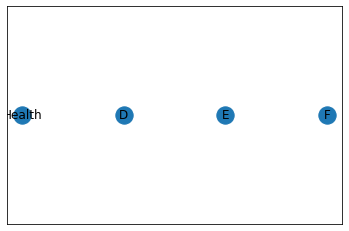

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

MyGraph = nx.Graph()

MyGraph.add_node('Health', npos=(40, 100), station='Station C', ccn='#00FF00')
MyGraph.add_node('D', npos=(60, 100), station='Station D', ccn='#00FF00')

# Orange Line
MyGraph.add_node('E', npos=(80, 100), station='Station E', ccn='#FF4500')
MyGraph.add_node('F', npos=(100, 100), station='Station F', ccn='#FF4500')

pos = nx.get_node_attributes(MyGraph, 'npos')
nx.draw_networkx(MyGraph, pos)